In [1]:
import sys
sys.path.append('D:\portfolio\Generalized-Linear-Models\src')

In [2]:
from preprocessing import preprocess_data
from linear_model import LinearRegressionScratch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

file_path = 'D:\portfolio\Generalized-Linear-Models\data\pima_diabetes.csv'
target_column = 'Outcome'
X_train, X_test, y_train, y_test = preprocess_data(file_path, target_column)

X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
521,3,124,80,33,130,33.2,0.305,26
737,8,65,72,23,0,32.0,0.600,42
740,11,120,80,37,150,42.3,0.785,48
660,10,162,84,0,0,27.7,0.182,54
411,1,112,72,30,176,34.4,0.528,25


In [7]:
model = LinearRegressionScratch(lr=0.00001, n_iters=1000)
model.fit(X_train, y_train)

[ 7.38096337e-03  3.75338581e-03  2.20657521e-02  1.67336781e-02
  6.34149320e-03  3.55461162e-03 -1.93283500e-03 -3.00555507e-03
  1.87530356e-02  6.63715847e-04  2.30844722e-02  5.65375429e-04
  4.39295830e-03  1.37315150e-02  1.72163264e-02  1.34241299e-02
  8.36130812e-03  1.40744714e-02  2.39586245e-02  1.84900048e-02
  1.89497414e-02 -1.34941629e-03 -1.62375977e-03  8.66385014e-04
 -4.02781301e-03  1.67756653e-02  2.98471844e-03  9.25804847e-03
  1.60925795e-02  1.87883350e-02  6.56439226e-03  8.43482889e-03
  4.92846193e-03  1.82368559e-02  3.12064373e-02  9.73455191e-03
 -4.75001057e-04  2.04358106e-02  7.86220168e-03  4.91667708e-03
  6.68069355e-03 -1.72270739e-03  8.73198453e-03  1.77888262e-02
  1.11279292e-02  2.48018222e-04  1.41300040e-02 -2.70239679e-03
  8.27773377e-03  6.72437864e-03 -3.52104472e-04  1.87699618e-02
  7.84465881e-03  8.68153723e-03  7.26642755e-03  1.37980425e-02
 -9.68557370e-03  4.76386188e-03  1.94445399e-02  6.03320974e-03
  1.16185516e-02  2.21619

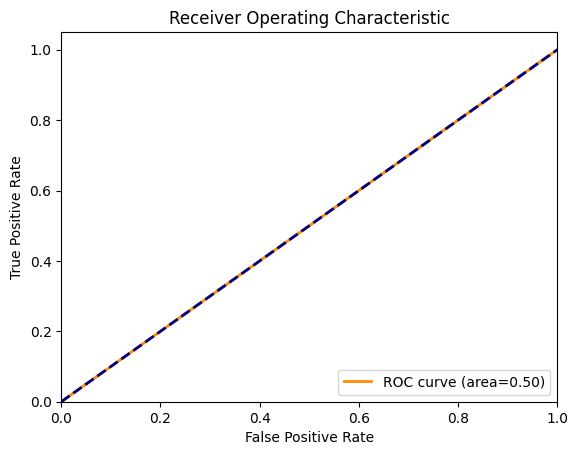

In [9]:
y_pred_prob = model.predict(X_test)
print(y_pred_prob)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()